##### This Project is based on exploring and visualizing data for hotels having cancellation on bookings, lower revenue. Thus, generates report to solve these issues to generate higher revenue as the main concern of the hotels.

This Project applies the following steps.
1. Understand the Problem
2. Identify data to  explore and analyze
3. Data Exploration and Cleaning
4. Analyze data to receive meaningful insights
5. Data Visualization Reports

##### Major Questions.
1. Identify variables affecting higher cancellations of booking
2. Make booking cancellations decrease
3. Insignts to make pricing and promotional decisions better

##### General HYPOTHESIS 
1. Cancellations occur due to higher price
2. Longer waiting list results frequent cancellations
3. Reservations made from offline travel agents are higher

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')    #ignores warnings


#### Loading Dataset

In [2]:
data = pd.read_csv ('hotel_booking.csv')
data.head ()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


#### Data Exploration and Cleaning

In [3]:
data.tail ()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [4]:
print (data.shape)

(119390, 32)


In [5]:
print (data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [6]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##### Since, reservation_status_date is in object data type,  convert it to datetime

In [7]:
data ['reservation_status_date'] = pd.to_datetime (data ['reservation_status_date'] )

In [8]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
# see other object data type values or categories using include
    
data.describe (include = 'object')           

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [10]:
# Check the categories of the object types

for col in data.describe (include = 'object'). columns:
    print (col)
    print (data[col].unique () )  # retrieve unique cols
    print ('-'*100)       # create string concatenated by 100 hyphens to make cols clearer and separate

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [11]:
# Check the missing values in data

data.isnull ().sum ()   # return total null cols

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# Drop the cols with missing values, we wont use agent and company has too much null, unable to handle these nulls

data.drop (['agent', 'company'], axis = 1, inplace = True)            # inplace to make changes in data, axis indicates they need to be removed

data.dropna (inplace = True)                                          # remove rows with missing values


In [13]:
data.isnull ().sum ()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
#### Summary statistics od whole data

data.describe ()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


##### I detected the outliers from the above data. such as 10 babies, 55 adults and adr as 5400 which is too high compared to avg other data, hence I now remove the outlier

In [15]:
data = data [data['adr'] < 5000]           #remove adr value greater than 5000 in the dataset
data.describe ()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


#### Data Analysis and Visualzation

In [16]:
# Check the cancellations and reservations not cancelled from 2015 to 2017 data

percent_cancelled = data ['is_canceled'].value_counts (normalize = True)        #setting Normalize=True returns the %
percent_cancelled

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

##### Since 37% cancellation is too high, we can say low revenue is caused by cancellation.
##### Let's visualization this cancellation percent

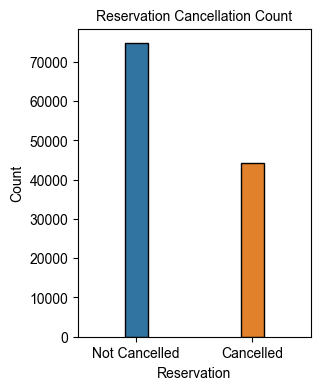

In [17]:
plt.figure (figsize = (3,4)) # width, height
plt.title ('Reservation Cancellation Count', fontsize = 10)

sns.set_style ('darkgrid')
ax = sns. barplot (x = ['Not Cancelled', 'Cancelled'], y = data['is_canceled'].value_counts (), edgecolor = 'k', width = 0.2 )
plt.xlabel ('Reservation')
plt.ylabel ('Count')
plt.show ()

##### Let's see out of 2 hotels, which has the highest cancellation percent.

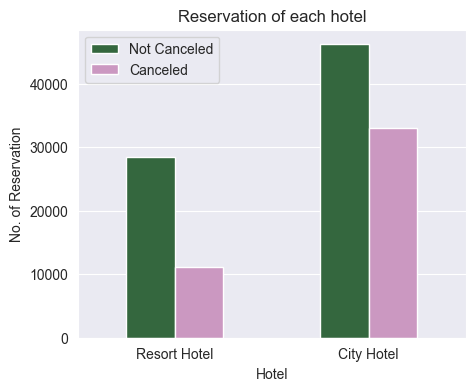

In [18]:
plt.figure (figsize = (5,4))
hotelcancels = sns.countplot (x = 'hotel', hue = 'is_canceled', data = data, palette = 'cubehelix', width = 0.5)

plt.title ('Reservation of each hotel')
plt.xlabel ('Hotel')
plt.ylabel ('No. of Reservation')
plt.legend (['Not Canceled', 'Canceled'], loc = 'upper left')
plt.show ()

##### We see City Hotel has too high cancellation than Resort Hotel


##### Let's see the cancellation percentage filtering data

In [19]:
# see cancellation percent for Resort Hotel

resort_hotel = data[data['hotel'] == 'Resort Hotel']
print( resort_hotel['is_canceled'].value_counts (normalize = True) )


0    0.72025
1    0.27975
Name: is_canceled, dtype: float64


In [20]:
# see cancellation percent for City Hotel

city_hotel = data[data['hotel'] == 'City Hotel']
print( city_hotel['is_canceled'].value_counts (normalize = True) )


0    0.582918
1    0.417082
Name: is_canceled, dtype: float64


#### Now, let's see if Price is affecting the cancellation by grouping data for reservation status and adr (avg daily rate)

In [21]:
resort_hotel = resort_hotel.groupby ('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby ('reservation_status_date')[['adr']].mean()


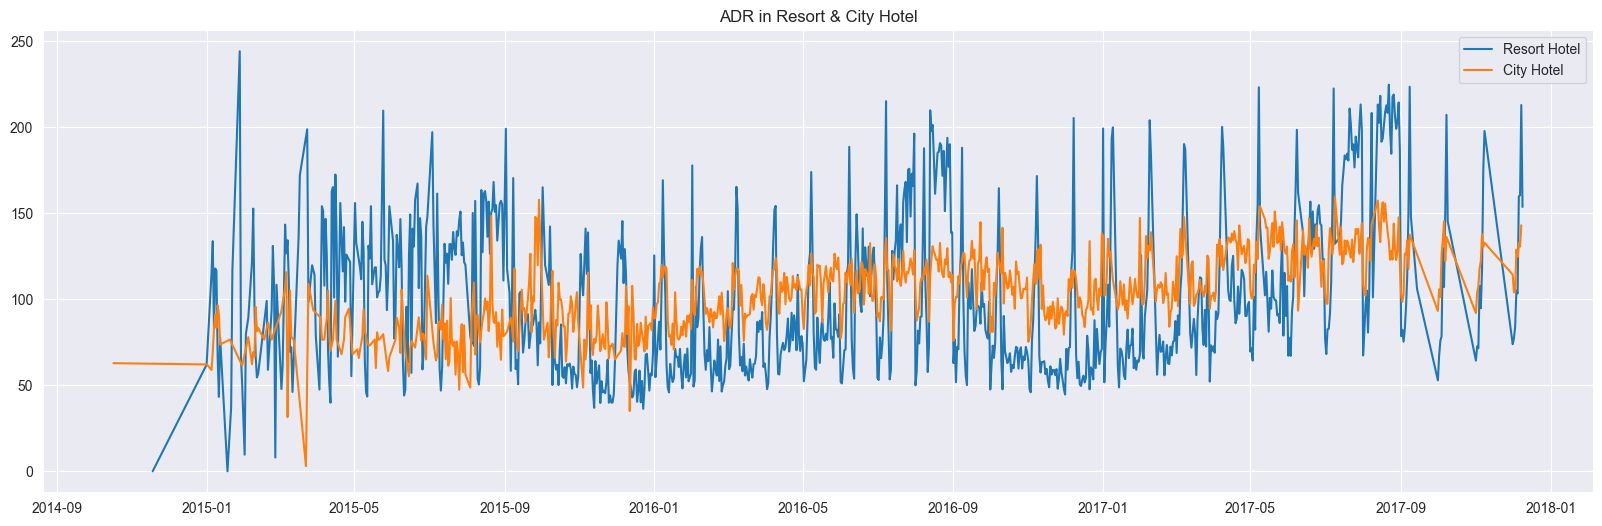

In [22]:
#Visuliza the AVG Daily Rate in both Hotels

plt.figure (figsize = (20,6))
plt.title ('ADR in Resort & City Hotel', fontsize = 12)
plt.plot (resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot (city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend (fontsize = 10)
plt.show ()

##### Let's see reservation by month, using the datetime column previously converted.

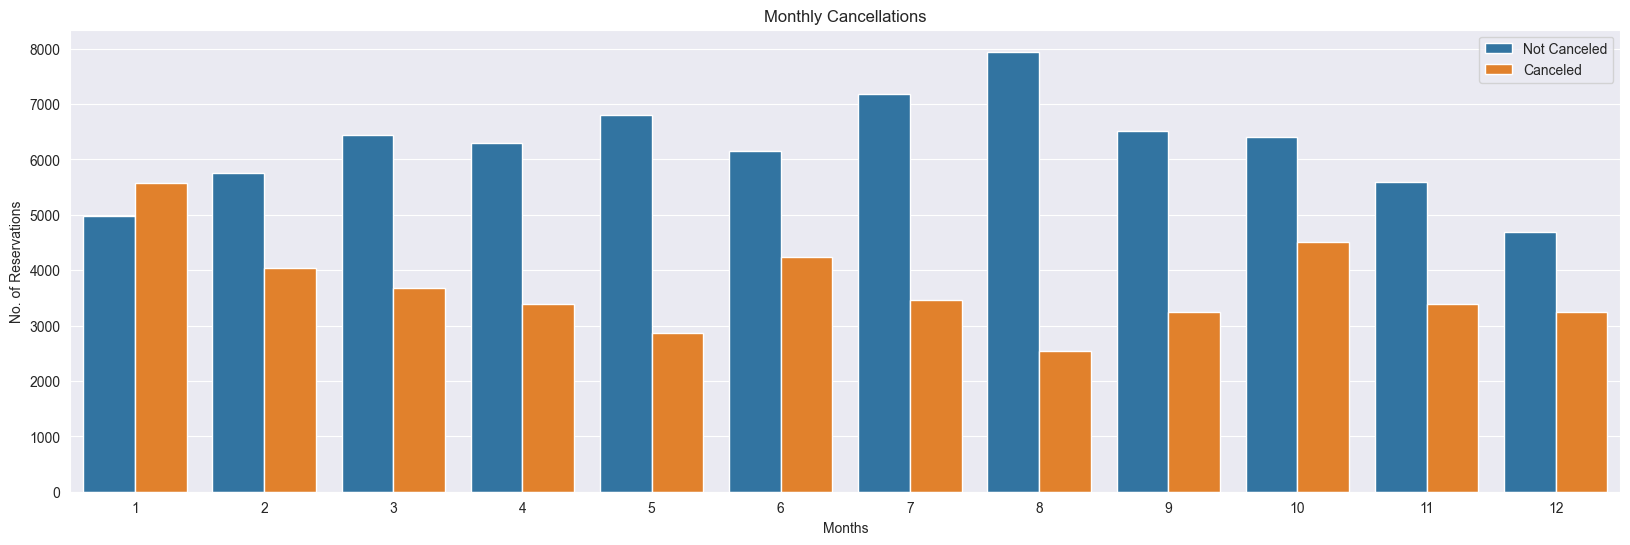

In [23]:
# Create column month to store months 
data['month'] = data['reservation_status_date'].dt.month

#Now, visualize months cancellation
plt.figure (figsize = (20,6))
month_cancels = sns.countplot (x = 'month', hue = 'is_canceled', data = data)

plt.xlabel ('Months')
plt.ylabel ('No. of Reservations')
plt.title ('Monthly Cancellations')
plt.legend (['Not Canceled', 'Canceled'])
plt.show ()

##### The data shows the highest reservation in August with lowest cancellation in the same month. It also indicates, lowest reservation and highest cancellation for January and similar for December. Let's exprore price in these months, to see if pricing is affecting these cancellation.

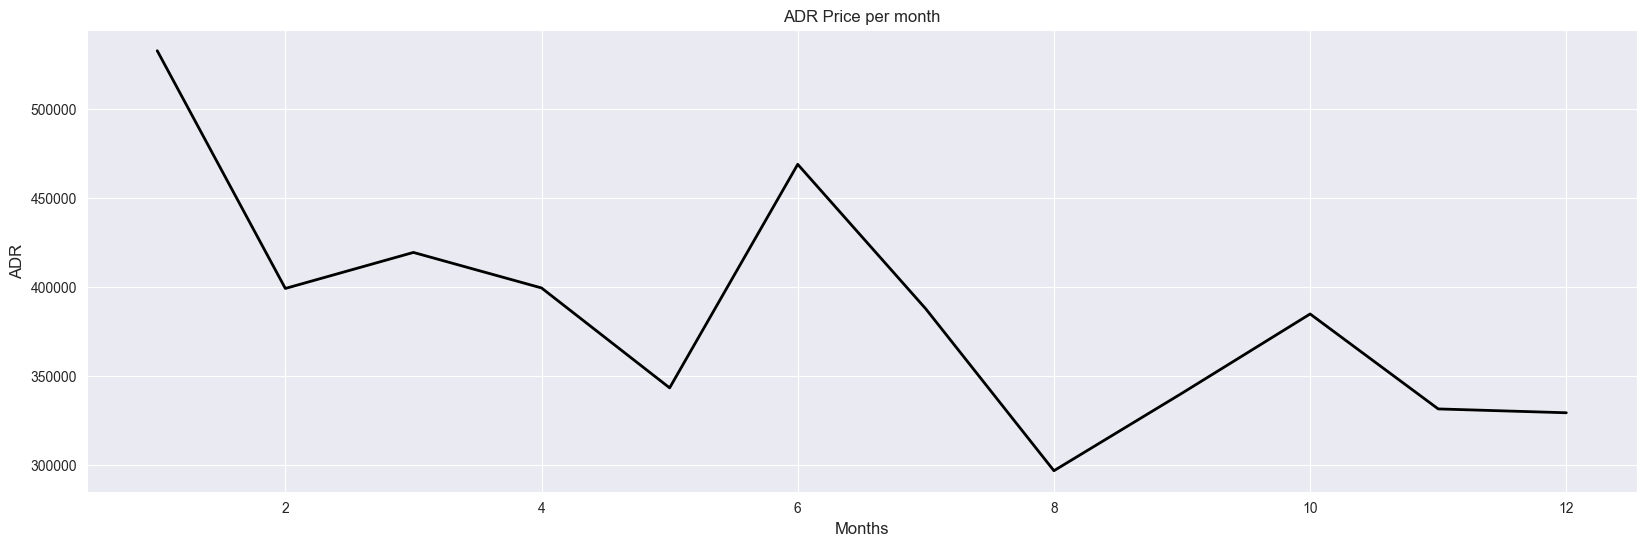

In [24]:
plt.figure (figsize = (20,6))
plt.title ('ADR Price per month', fontsize = 12)
sns.lineplot (x = 'month', y = 'adr', data = data[data['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(), linewidth = 2, color = 'k' )
plt.xlabel ('Months', fontsize = 12)
plt.ylabel ('ADR', fontsize = 12)
plt.show()

##### The linechart clearly shows the highest price in January (1), the month with highest cancellation and lowest price in August, the month with the least cancelled reservations.

##### Now, let's check the cancellation by country. Since, there are 177 unique countries as we found by describing the objects, we only select top 10 countries


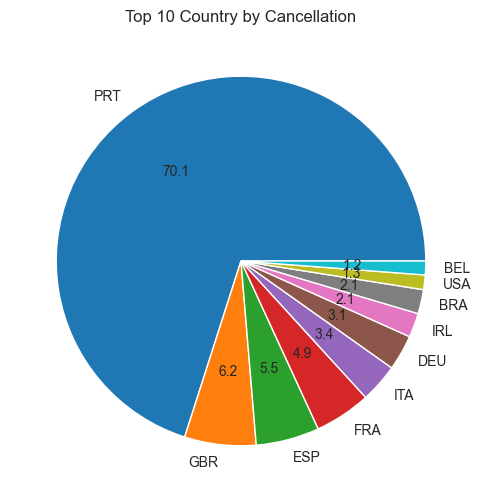

In [25]:
# Store cancelled data
cancelled_data = data [data['is_canceled'] ==1]
top_10 = cancelled_data['country'].value_counts()[:10]    #everything for top 20, as this returns in DESC order

plt.figure (figsize = (6,6))
plt.title ('Top 10 Country by Cancellation')
plt.pie (top_10, labels = top_10.index, autopct = '%.1f')
plt.show ()


##### The pie chart depicts Portugal having 70% cancellation while others have much less.
###### Hence, hotels in Portugal must consider Pricing, Facilities, Promotions, Offers, etc.

##### Let's check the clients now, on how they are coming on contact using column market segment

In [26]:
data['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

##### Lets, see the result in percent as well.

In [27]:
data['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

##### Hence, this detects that clients mostly come from online TA.
###### Now, let's also check the cancellation percent for the clients.

In [28]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

##### Here, we can see the highest cancellation is again from the Online TA. About 47% has been cancelled.

##### Let's see if ADR is high for cancelled or not cancelled reservations.

In [34]:
#not cancelled data
not_cancelled_data = data [data['is_canceled'] == 0]

#grouping data by reservation status
cancelled_data_adr = cancelled_data.groupby ('reservation_status_date')[['adr']].mean()          # groupby adr
cancelled_data_adr.reset_index (inplace = True)                                                  # reset index and change in data
cancelled_data_adr.sort_values ('reservation_status_date', inplace = True)                       #sort by ASC

not_cancelled_data_adr = not_cancelled_data.groupby ('reservation_status_date')[['adr']].mean()          # groupby adr
not_cancelled_data_adr.reset_index (inplace = True)                                                  # reset index and change in data
not_cancelled_data_adr.sort_values ('reservation_status_date', inplace = True)                       #sort by ASC



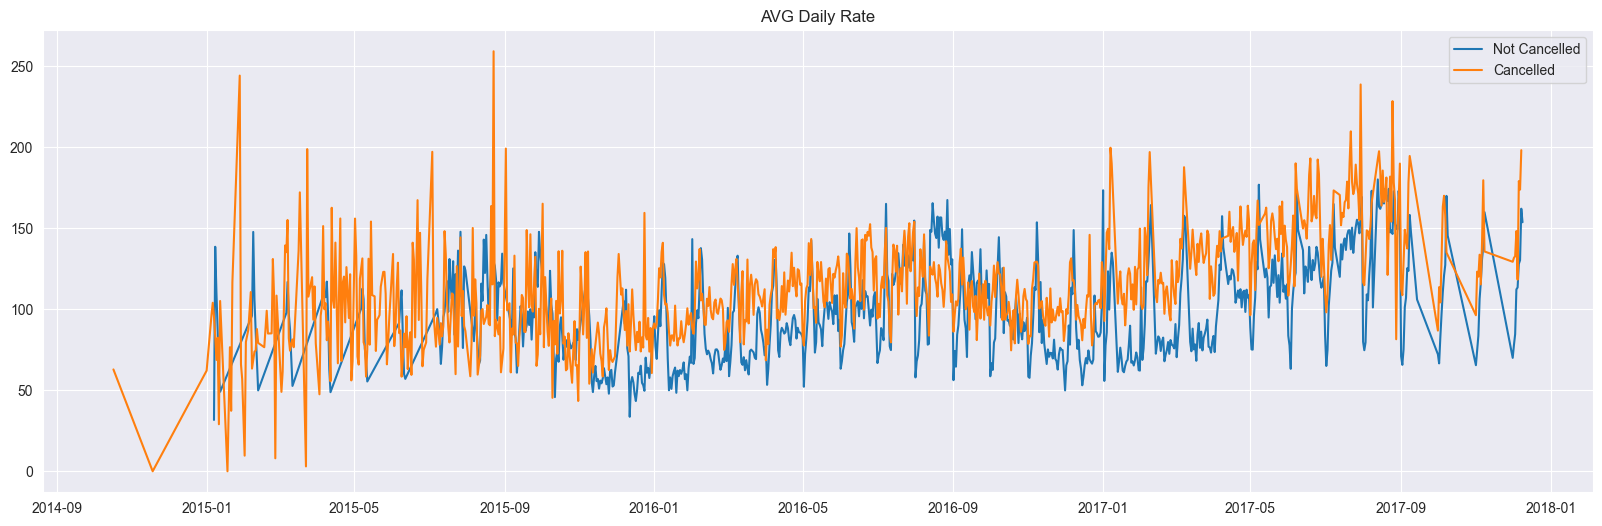

In [35]:
# Plotting the ADR cancellations

plt.figure (figsize = (20,6))
plt.title ('AVG Daily Rate')
plt.plot (not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'], label = 'Not Cancelled')
plt.plot (cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'], label = 'Cancelled')
plt.legend ()
plt.show ()

#####  Thus it can be said, ADR is affecting the cancellation from the graph.